<a href="https://colab.research.google.com/github/Armin-Abdollahi/Bone-Age-Estimation/blob/main/Bone_Age_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Regression task for bone age estimation

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam

In [ ]:
# Load the labels
labels_path = '/content/drive/MyDrive/Digital_Hand_Atlas_Dataset/Total_Images/Bordered_XRay_Images/Label.csv'
labels = pd.read_csv(labels_path)

In [ ]:
labels['Case ID'] = labels['Case ID'].apply(lambda x: str(x)+'.jpg')

labels.head()

,Case ID,Bone Age,Male,Location
0,1.jpg,0,False,Asian
1,2.jpg,0,False,Asian
2,3.jpg,0,False,Asian
3,4.jpg,0,False,Asian
4,5.jpg,0,False,Asian


In [ ]:
# Ensure the 'Case ID' column is of type string
labels['Case ID'] = labels['Case ID'].astype(str)

In [ ]:
# Create the image data generator
datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)

In [ ]:
# Create the train and validation generators
train_generator = datagen.flow_from_dataframe(
    dataframe=labels,
    directory='/content/drive/MyDrive/Digital_Hand_Atlas_Dataset/Total_Images/Bordered_XRay_Images',
    x_col='Case ID',
    y_col='Bone Age',
    target_size=(256, 256),
    color_mode='grayscale',
    class_mode='raw',
    batch_size=32,
    subset='training'
)

validation_generator = datagen.flow_from_dataframe(
    dataframe=labels,
    directory='/content/drive/MyDrive/Digital_Hand_Atlas_Dataset/Total_Images/Bordered_XRay_Images',
    x_col='Case ID',
    y_col='Bone Age',
    target_size=(256, 256),
    color_mode='grayscale',
    class_mode='raw',
    batch_size=32,
    subset='validation'
)

Found 5915 validated image filenames.
Found 1478 validated image filenames.


In [ ]:
# Build the CNN model
model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(256, 256, 1)),
    MaxPooling2D(2, 2),
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    Conv2D(128, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='linear')  # Linear activation for regression
])

In [ ]:
# Compile the model
model.compile(optimizer=Adam(), loss='mean_squared_error', metrics=['mae'])

In [ ]:
# Train the model
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // 32,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // 32,
    epochs=10
)

Epoch 1/10
184/184 [==============================] - 2186s 12s/step - loss: 13.7862 - mae: 2.5479 - val_loss: 4.7875 - val_mae: 1.7127
Epoch 2/10
184/184 [==============================] - 323s 2s/step - loss: 5.3079 - mae: 1.7565 - val_loss: 3.9419 - val_mae: 1.5397
Epoch 3/10
184/184 [==============================] - 338s 2s/step - loss: 4.8130 - mae: 1.6668 - val_loss: 4.0213 - val_mae: 1.6230
Epoch 4/10
184/184 [==============================] - 313s 2s/step - loss: 4.0725 - mae: 1.5189 - val_loss: 4.2755 - val_mae: 1.6267
Epoch 5/10
184/184 [==============================] - 343s 2s/step - loss: 3.8990 - mae: 1.4805 - val_loss: 5.7070 - val_mae: 1.7483
Epoch 6/10
184/184 [==============================] - 318s 2s/step - loss: 3.3582 - mae: 1.3772 - val_loss: 3.4978 - val_mae: 1.4331
Epoch 7/10
184/184 [==============================] - 356s 2s/step - loss: 3.1712 - mae: 1.3231 - val_loss: 3.6373 - val_mae: 1.4481
Epoch 8/10
184/184 [==============================] - 284s 2s/step

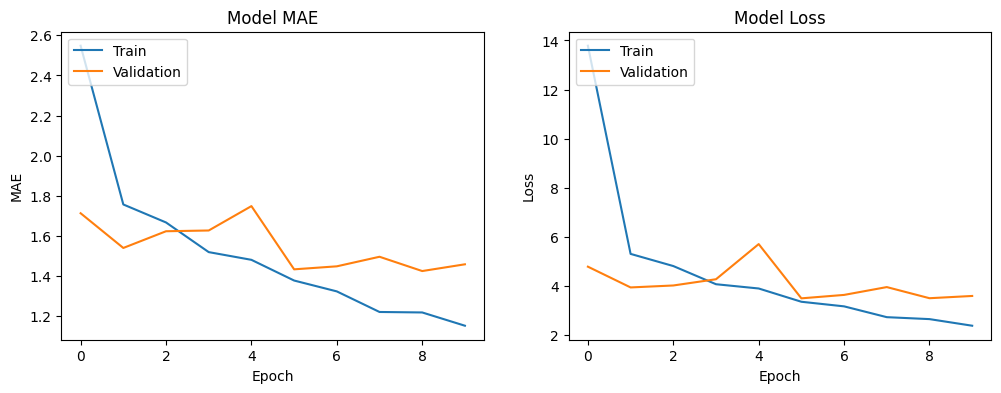

In [ ]:
# Plot training & validation MAE values
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['mae'])
plt.plot(history.history['val_mae'])
plt.title('Model MAE')
plt.ylabel('MAE')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.show()

In [ ]:
# Save the model
model.save('/content/drive/MyDrive/bone_age_cnn_model.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


## Classification task for bone age estimation

In [2]:
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam

In [3]:
# Load the labels
labels_path = '/content/drive/MyDrive/Digital_Hand_Atlas_Dataset/Total_Images/Bordered_XRay_Images/Classification_Task_Labels.csv'
labels = pd.read_csv(labels_path)

In [11]:
labels['Case ID'] = labels['Case ID'].apply(lambda x: str(x)+'.jpg')

labels.head()

,Case ID,Bone Age,Male,Location,Group,Age Group
0,1.jpg,0,False,Asian,A,Group A
1,2.jpg,0,False,Asian,A,Group A
2,3.jpg,0,False,Asian,A,Group A
3,4.jpg,0,False,Asian,A,Group A
4,5.jpg,0,False,Asian,A,Group A


In [12]:
# Map bone age to age groups (Group A, B, C)
def map_to_age_group(bone_age):
    if bone_age <= 5:
        return 'Group A'
    elif 6 <= bone_age <= 12:
        return 'Group B'
    else:
        return 'Group C'

labels['Age Group'] = labels['Bone Age'].apply(map_to_age_group)

In [13]:
# Ensure the 'Case ID' column is of type string
labels['Case ID'] = labels['Case ID'].astype(str)

In [14]:
# Create the image data generator
datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)

In [15]:
# Create the train and validation generators
train_generator = datagen.flow_from_dataframe(
    dataframe=labels,
    directory='/content/drive/MyDrive/Digital_Hand_Atlas_Dataset/Total_Images/Bordered_XRay_Images',
    x_col='Case ID',
    y_col='Age Group',  # Use the new 'Age Group' column
    target_size=(256, 256),
    color_mode='grayscale',
    class_mode='categorical',  # Use categorical mode for classification
    batch_size=32,
    subset='training'
)

validation_generator = datagen.flow_from_dataframe(
    dataframe=labels,
    directory='/content/drive/MyDrive/Digital_Hand_Atlas_Dataset/Total_Images/Bordered_XRay_Images',
    x_col='Case ID',
    y_col='Age Group',
    target_size=(256, 256),
    color_mode='grayscale',
    class_mode='categorical',
    batch_size=32,
    subset='validation'
)

Found 5915 validated image filenames belonging to 3 classes.
Found 1478 validated image filenames belonging to 3 classes.


In [16]:
# Build the modified CNN model
model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(256, 256, 1)),
    MaxPooling2D(2, 2),
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    Conv2D(128, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(3, activation='softmax')  # Three output neurons for age groups
])

In [17]:
# Compile the model
model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])

In [18]:
# Train the model
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // 32,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // 32,
    epochs=10
)

Epoch 1/10
184/184 [==============================] - 2138s 12s/step - loss: 0.5974 - accuracy: 0.7797 - val_loss: 0.4569 - val_accuracy: 0.7996
Epoch 2/10
184/184 [==============================] - 302s 2s/step - loss: 0.3672 - accuracy: 0.8448 - val_loss: 0.4269 - val_accuracy: 0.8105
Epoch 3/10
184/184 [==============================] - 305s 2s/step - loss: 0.3054 - accuracy: 0.8706 - val_loss: 0.4273 - val_accuracy: 0.8152
Epoch 4/10
184/184 [==============================] - 326s 2s/step - loss: 0.2506 - accuracy: 0.8961 - val_loss: 0.4416 - val_accuracy: 0.8118
Epoch 5/10
184/184 [==============================] - 338s 2s/step - loss: 0.1739 - accuracy: 0.9300 - val_loss: 0.5277 - val_accuracy: 0.8030
Epoch 6/10
184/184 [==============================] - 329s 2s/step - loss: 0.1337 - accuracy: 0.9492 - val_loss: 0.5720 - val_accuracy: 0.7846
Epoch 7/10
184/184 [==============================] - 326s 2s/step - loss: 0.0902 - accuracy: 0.9667 - val_loss: 0.6543 - val_accuracy: 0.79

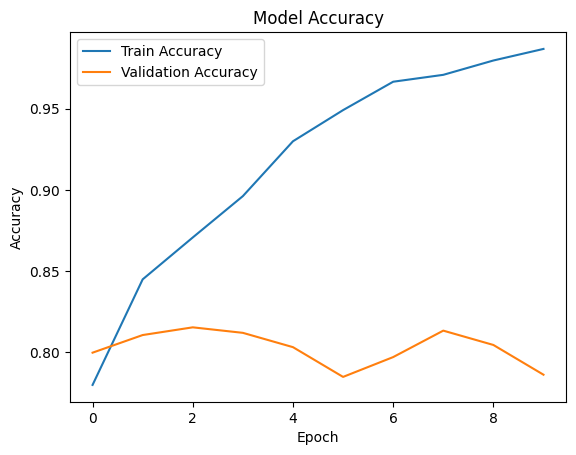

In [19]:
# Plot training & validation accuracy
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [20]:
# Save the model
model.save('/content/drive/MyDrive/bone_age_classification_model.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
